# TP Neural Networks for Regression
Polytech SI4

Diane Lingrand Diane.Lingrand@univ-cotedazur.fr

2024-2025

In [5]:
import numpy as np
import torch
import keras
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation 
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

## Neural network as a function approximator

In this first part, your goal is to learn the following mathematical function from samples and using a neural network. The code provided in this section will help you to start. This code is running without errors but the quality of the result is poor. Your goal is to improve this code.

In [8]:
def myFunction(x):
    return 0.6+2*(x+2*(x*10)**2-(x*10)**3)*torch.exp(-x*10)

### generation of the dataset (samples from 'myFunction')

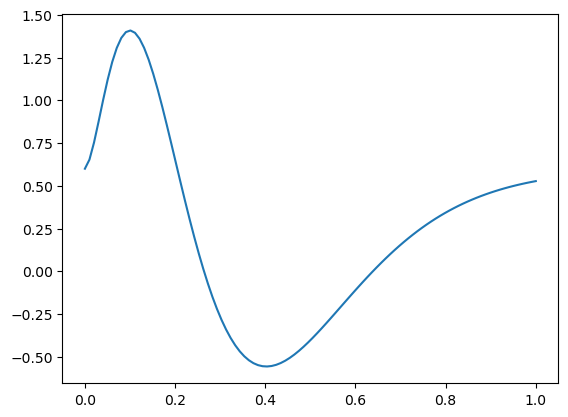

In [10]:
nbData = 100
X = torch.linspace(0,1, nbData)
y = myFunction(X)
plt.plot(X,y)

<font color="green"><b>Question:</b></font> Split the data set into train/test sets. Start using the same method as last week (split on indices).

In [12]:
# your work here

In [13]:
# CORRECTION
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
print(len(X_train),len(X_test))

80 20


<font color="green"><b>Question:</b></font> Plot the train and test sets using different colors

In [15]:
# your work here

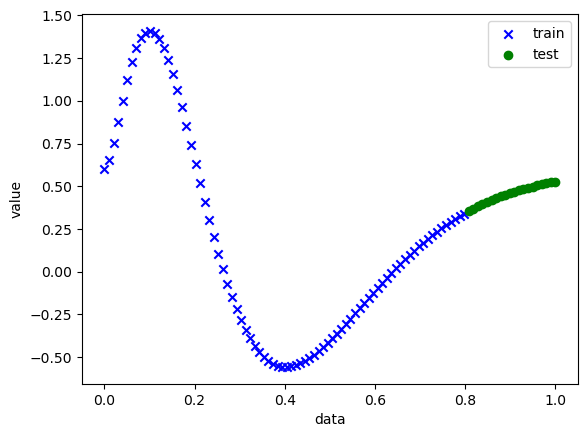

In [16]:
# CORRECTION
plt.scatter(X_train,y_train, marker='x', color='blue',label='train')
plt.scatter(X_test,y_test, marker='o', color='green', label='test')

plt.xlabel('data')
plt.ylabel('value')
plt.legend()

<font color="green"><b>Question:</b></font> You won't be able to learn all the parts of the curve using this train dataset and the test on the test set is non-sens. Two solutions: shuffle the dataset before splitting or use **sklearn.model_selection.train_test_split** that will perform the same operations. 

In [25]:
# your work here

In [27]:
# CORRECTION
# split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

<font color="green"><b>Question:</b></font> Plot again the train and test sets.

In [30]:
# your work here

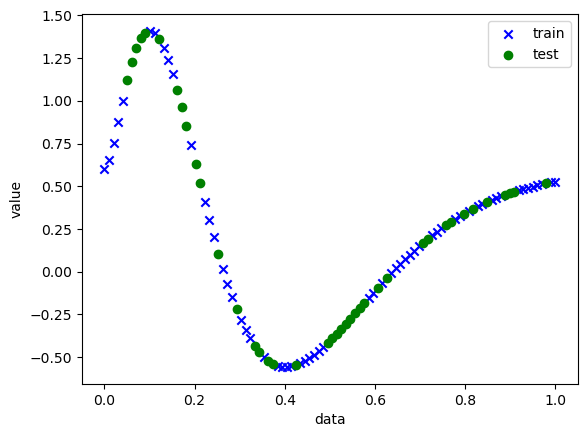

In [32]:
# CORRECTION
plt.scatter(X_train,y_train, marker='x', color='blue',label='train')
plt.scatter(X_test,y_test, marker='o', color='green', label='test')

plt.xlabel('data')
plt.ylabel('value')
plt.legend()
#plt.savefig('simpleRegressionProblem.pdf')

### the neural network

In [35]:
#topology
model = Sequential()
model.add(keras.Input(shape=(1,)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='mse')

<font color="green"><b>Question:</b></font> Display the architecture and the number of parameters you will have to learn (method 'summary').

In [38]:
# your work here

In [40]:
# CORRECTION
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

<font color="green"><b>Question:</b></font> Learn 10 epochs using a batch size of 32

In [43]:
# your work here

In [45]:
# CORRECTION
#learning
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - loss: 0.3419 - val_loss: 0.4015
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3256 - val_loss: 0.3994
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3267 - val_loss: 0.3979
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3254 - val_loss: 0.3965
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3408 - val_loss: 0.3955
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3158 - val_loss: 0.3943
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.3274 - val_loss: 0.3933
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3370 - val_loss: 0.3925
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3245 - val_loss: 0.3918
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3174 - val_loss: 0.3910


<font color="green"><b>Question:</b></font> Plot the history. Are you satisfied with the convergence?

In [48]:
# your work here

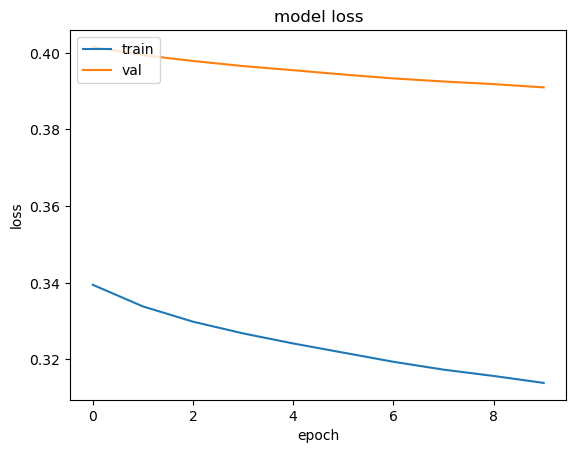

In [50]:
# CORRECTION:
## yes with this bad network
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#plt.savefig('evolHistoryMSE.pdf')

<font color="green"><b>Question:</b></font> Compute and display the mse score (method 'evaluate'). Is it good?

In [53]:
# your work here

In [55]:
# CORRECTION
# evaluation of performance
yTrainPred = model.predict(X_train)
yTestPred = model.predict(X_test)
score = model.evaluate(X_test,y_test)
print("test score = %.2f" % (score))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4183 
test score = 0.41


<font color="green"><b>Question:</b></font> It could be difficult to interpret this *mse* value. Instead, plot again the theoretical curve (the 'truth') along with the prediction for the train and the test sets (using different colors). Are you satisfied with the result?

In [58]:
# your work here

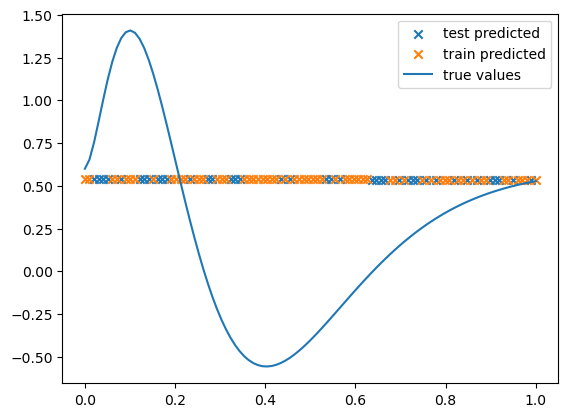

In [341]:
# CORRECTION
# we plot the true values and the prediction
plt.scatter(X_test,yTestPred, marker='x', label='test predicted')
plt.scatter(X_train,yTrainPred, marker='x',label='train predicted')
plt.plot(X,y, label='true values')
plt.legend()
#plt.savefig('duringLearning.pdf')

In [ ]:
# FOR SLIDES
# ANIMATION PREPARATION
nbData = 10000
X = torch.linspace(0,1, nbData)
y = myFunction(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

model = Sequential()
model.add(keras.Input(shape=(1,)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mse')

for i in range(100,400):
    plt.figure()
    model.fit(X_train, y_train, epochs=4, validation_split=0.2, batch_size=32)
    yTrainPred = model.predict(X_train)
    yTestPred = model.predict(X_test)
    plt.scatter(X_test[::100],yTestPred[::100], marker='x', label='test predicted')
    plt.scatter(X_train[::100],yTrainPred[::100], marker='x',label='train predicted')
    plt.plot(X,y, label='true values')
    plt.legend()
    name = 'animReg'+str(i)+'.png'
    plt.savefig(name)

<font color="green"><b>Question:</b></font> Looking at this picture, you may see that both predictions from train or test are bad. This means that you have not learned the correct functions using your neural network.
You can improve this by answering to these questions:
- is the network adapted to your problem? Check carefully the entry and the output!
- do you have enough data ? too much ?
- is the topology of the neural network too simple ? too complex ? 
- are the parameters of the neural network well chosen ?
- did the network stop too early (not converged) or too late (overfitting)?

Maybe, you will have to change many hyper-parameters together.

Epoch 1/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8971 - val_loss: 0.5483
Epoch 2/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4778 - val_loss: 0.3502
Epoch 3/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3283 - val_loss: 0.3136
Epoch 4/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3188 - val_loss: 0.3125
Epoch 5/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3095 - val_loss: 0.3103
Epoch 6/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3081 - val_loss: 0.3093
Epoch 7/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3187 - val_loss: 0.3078
Epoch 8/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3093 - val_loss: 0.3071
Epoch 9/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3088 - val_loss: 0.3060
Epoch 10/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3017 - val_loss: 0.3048
Epoch 11/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3057 - val_loss: 0.3037
Epoch 12/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

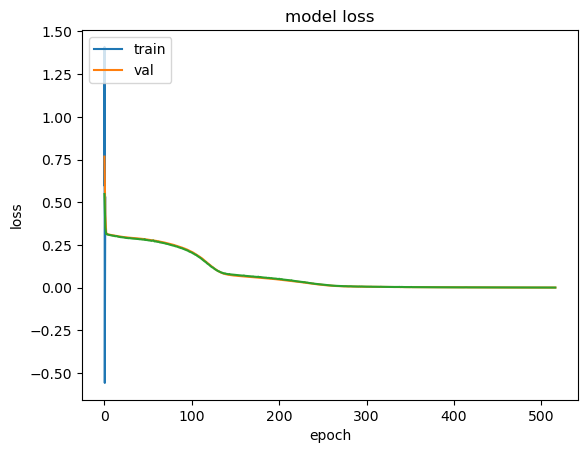

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.5533e-04
test score = 0.00


In [319]:
## CORRECTION
# 1 Remove the sigmoid of the last layer
# 2 add a callback for stopping when converged (and not only 10 epochs)
# 3 increase the dataset (and perhaps the batch size)
# 4 add layers and neurons, 

#10000
#80/80/20
nbData = 10000
X = torch.linspace(0,1, nbData)
y = myFunction(X)
plt.plot(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

model = Sequential()
model.add(keras.Input(shape=(1,)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mse')

ourCallback = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=20, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

history=model.fit(X_train, y_train, epochs=2000, batch_size=128, validation_split=0.2, callbacks=[ourCallback])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

yTrainPred = model.predict(X_train)
yTestPred = model.predict(X_test)
score = model.evaluate(X_test,y_test)
print("test score = %.2f" % (score))


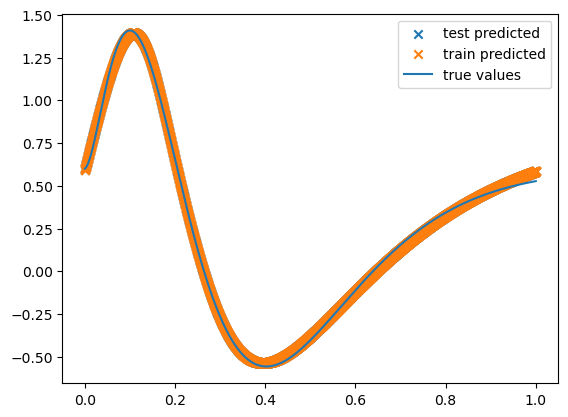

In [320]:
# CORRECTION
# we plot the true values and the prediction
plt.scatter(X_test,yTestPred, marker='x', label='test predicted')
plt.scatter(X_train,yTrainPred, marker='x',label='train predicted')
plt.plot(X,y, label='true values')
plt.legend()

## Regression using a toy dataset: diabetes

In this section, you will use another dataset that you can load using the sklearn library: <a href='https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html'>Diabetes dataset</a>

In [136]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()  # could also use X, y = load_diabetes(return_X_y=True)
X = diabetes.data
y = diabetes.target
print(diabetes.feature_names)


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


<font color="green"><b>Question:</b></font> How many data? What is the dimension of the data? What do you need to predict? What is the range of values to be predicted? What is the range of input data?

In [137]:
# your work

In [138]:
# CORRECTION
print('There are ', len(y), ' data of dimension ' , X.shape[1])
print('Target values are in the range of [', min(y), ',', max(y), '] ')
print('Data values are in the range of :\n min are ', np.min(X, axis=0), '\n max are ', np.max(X, axis=0))

There are  442  data of dimension  10
Target values are in the range of [ 25.0 , 346.0 ] 
Data values are in the range of :
 min are  [-0.10722563 -0.04464164 -0.0902753  -0.1123988  -0.12678067 -0.11561307
 -0.10230705 -0.0763945  -0.12609712 -0.13776723] 
 max are  [0.11072668 0.05068012 0.17055523 0.13204362 0.15391371 0.19878799
 0.18117906 0.18523444 0.13359728 0.13561183]


<font color="green"><b>Question:</b></font> Build, learn and evaluate different neural networks and select the one that gives the best results. Start with simple models.

In [ ]:
# your work

Epoch 1/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.5230 - val_loss: 4.4686
Epoch 2/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.3104 - val_loss: 4.3147
Epoch 3/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.1195 - val_loss: 4.1898
Epoch 4/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0655 - val_loss: 4.0817
Epoch 5/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.9470 - val_loss: 3.9834
Epoch 6/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8021 - val_loss: 3.8916
Epoch 7/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7399 - val_loss: 3.8055
Epoch 8/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6618 - val_loss: 3.7236
Epoch 9/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6272 - val_loss: 3.6454
Epoch 10/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.5134 - val_loss: 3.5695
Epoch 11/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.4646 - val_loss: 3.4962
Epoch 12/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3771 - va

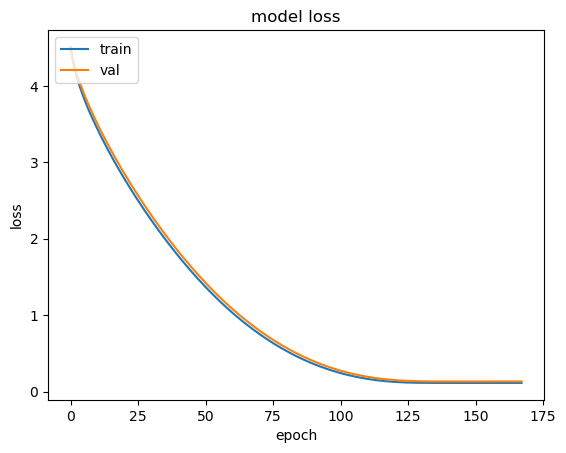

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0955
test score = 9739.93


In [141]:
# CORRECTION

correctionMSE = (np.max(y)-np.min(y))**2 # for easy comparison when no scaling of y

y = (y-min(y))/(np.max(y)-np.min(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

model = Sequential()
model.add(keras.Input(shape=(10,)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mse')
diabetes = load_diabetes()

ourCallback = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=20, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

history=model.fit(X_train, y_trainN, epochs=2000, batch_size=128, validation_split=0.2, callbacks=[ourCallback])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

score = model.evaluate(X_test,y_test)
print
print("test score = %.2f" % (score*correctionMSE))
# 18009 without output scaled into [0,1]

<font color="green"><b>Question:</b></font> Experiment is <a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler'>StandardScaler</a> could improve the results.

In [ ]:
# your work